In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pymeasure.instruments.srs import SR830



In [1]:
from pymeasure.instruments.srs import SR830
from pymeasure.instruments.tektronix import AFG3152C

ag = AFG3152C('GPIB0::2::INSTR')
lockin1 = SR830('GPIB0::12::INSTR')
lockin2 = SR830('GPIB2::9::INSTR')

In [35]:
samp_freq = 1
TC=0.1

for lockin in [lockin1, lockin2]:
    lockin.sample_frequency = samp_freq
    lockin.time_constant = TC
    print(lockin.sample_frequency, lockin.time_constant)

1 0.1
1 0.1


In [24]:
2**14

16384

In [22]:
display(lockin1.sample_frequency)
display(lockin1.time_constant)

display(lockin2.sample_frequency)
display(lockin2.time_constant)

8

0.01

8

0.01

# SR830 Code samples

In [13]:
gpib_addr = '2::9'
# gpib_addr = '0::12'
lockin_pym = SR830(f'GPIB{gpib_addr}::INSTR')
print(lockin_pym.id)
lockin_pym.sample_frequency = 256
lockin_pym.write('FAST0')


print(lockin_pym.SAMPLE_FREQUENCIES)

lockin_pym.sample_frequency=0.25
print(lockin_pym.sample_frequency)



Stanford_Research_Systems,SR830,s/n86942,ver1.07
[0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
0.25


(array([-2.34479103e-13, -1.63424829e-13,  3.90798505e-14, -1.95399252e-13,
         4.61852778e-13]),
 array([1.84385840e-11, 1.87867499e-11, 1.87476701e-11, 1.88009608e-11,
        1.88968841e-11]))

In [15]:
result=lockin_pym.buffer_measure_from_bytes(count=10)
display(result)

(array([-8.17124146e-14,  1.38911105e-12,  6.39488462e-13, -1.73727699e-12,
         1.77635684e-14,  3.55271368e-15, -1.13686838e-12, -2.82796009e-12,
        -4.86721774e-13, -6.89226454e-13]),
 array([1.92663663e-11, 1.93516314e-11, 2.06199502e-11, 1.95825578e-11,
        1.92628136e-11, 1.95612415e-11, 1.98916439e-11, 1.85416127e-11,
        1.93303151e-11, 1.91562322e-11]))

## pyvisa

<AxesSubplot:ylabel='Count'>

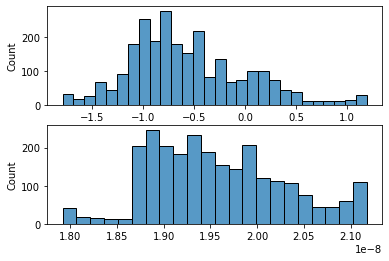

In [3]:
import numpy as np
from pyvisa import ResourceManager
from pyvisa.resources import MessageBasedResource
from time import sleep
class SR830Interface:
    def __init__(self, address):
        # Implement your instrument initialization logic here
        # Example: open a connection to the instrument
        self.rm = ResourceManager()
        self.instrument = self.rm.open_resource(address)

    def buffer_stats(self, time):
        xbuf, ybuf = self.buffer_measure(time =time)
        return [[np.mean(xbuf), np.std(xbuf)], [np.mean(ybuf), np.std(ybuf)]]

    def buffer_measure(self, time):
        self.reset_buffer()
        self.start_buffer()
        sleep(time)
        self.pause_buffer()
        x_bytes, y_bytes =self.read_buffer_bytes()
        x, y = self.buffer_bytes_convert(x_bytes), self.buffer_bytes_convert(y_bytes)
        return x, y


    def buffer_bytes_convert(self, buffer):
        byteproduct = np.array(list(buffer[0::4])) + np.array(list(buffer[1::4]))*2**8
        divsor, remainder = np.divmod(
            byteproduct, 
            32768*np.ones(shape = byteproduct.shape)
        )
        mant = remainder - divsor*2**15
        exp = np.array(list(buffer[2::4]))
        return mant*np.power(np.ones(shape = exp.shape)*2, exp-124)

    def read_buffer_bytes(self):
        buffer_size = self.n_buff()
        self.instrument.write(f'TRCL?1, 0, {buffer_size}')
        x_bytes = self.instrument.read_raw()
        self.instrument.write(f'TRCL?2, 0, {buffer_size}')
        y_bytes = self.instrument.read_raw()

        return [x_bytes, y_bytes]
    
    def read_buffer_ascii(self):
        buffer_size = self.n_buff()
        x_buffer = self.instrument.query_ascii_values(f"TRCA? 1, 0, {buffer_size}")
        y_buffer = self.instrument.query_ascii_values(f"TRCA? 2, 0, {buffer_size}")
        return[x_buffer, y_buffer]

    def start_buffer(self):
        self.instrument.write("STRT")

    def pause_buffer(self):
        self.instrument.write("PAUS")

    def reset_buffer(self):
        self.instrument.write("REST")

    def snap(self):
        return self.instrument.query('SNAP? 1,2')
    
    def n_buff(self):
        return float(self.instrument.query('SPTS?'))
lockin = SR830Interface(f'GPIB{gpib_addr}::INSTR')
xbuf, ybuf =lockin.buffer_measure(10)
fig, ax = plt.subplots(2,1)

sns.histplot(xbuf*1E3, ax = ax[0])
sns.histplot(ybuf*1E3, ax= ax[1])


## Pymeasures 

[0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


0.25


TypeError: 'int' object is not callable

In [ ]:
lockin.start_buffer()
lockin.n_buff()

2562.0

In [ ]:
lockin.read_buffer_bytes()

[b'G\x00L\x00H\x00L\x00I\x00L\x00J\x00L\x00K\x00L\x00K\x00L\x00L\x00L\x00L\x00L\x00M\x00L\x00N\x00L\x00O\x00L\x00O\x00L\x00P\x00L\x00Q\x00L\x00Q\x00L\x00R\x00L\x00S\x00L\x00S\x00L\x00T\x00L\x00U\x00L\x00V\x00L\x00W\x00L\x00W\x00L\x00X\x00L\x00Y\x00L\x00Z\x00L\x00Z\x00L\x00[\x00L\x00[\x00L\x00\\\x00L\x00]\x00L\x00^\x00L\x00_\x00L\x00`\x00L\x00a\x00L\x00b\x00L\x00c\x00L\x00e\x00L\x00f\x00L\x00g\x00L\x00h\x00L\x00i\x00L\x00j\x00L\x00k\x00L\x00l\x00L\x00m\x00L\x00o\x00L\x00p\x00L\x00q\x00L\x00r\x00L\x00s\x00L\x00t\x00L\x00v\x00L\x00w\x00L\x00x\x00L\x00y\x00L\x00y\x00L\x00{\x00L\x00|\x00L\x00}\x00L\x00~\x00L\x00\x7f\x00L\x00\x80\x00L\x00\x80\x00L\x00\x81\x00L\x00\x82\x00L\x00\x83\x00L\x00\x84\x00L\x00\x84\x00L\x00\x85\x00L\x00\x86\x00L\x00\x87\x00L\x00\x87\x00L\x00\x88\x00L\x00\x88\x00L\x00\x89\x00L\x00\x89\x00L\x00\x8a\x00L\x00\x8b\x00L\x00\x8c\x00L\x00\x8c\x00L\x00\x8d\x00L\x00\x8d\x00L\x00\x8e\x00L\x00\x8e\x00L\x00\x8f\x00L\x00\x8f\x00L\x00\x90\x00L\x00\x90\x00L\x00\x91\x00L\x00\x92\x00L

## Parallel measurement

In [ ]:
import concurrent.futures 
from multiprocessing import Process

addr_1 = 'GPIB2::9::INSTR'
addr_2 = 'GPIB0::12::INSTR'

lockin_1 = SR830Interface(addr_1)
lockin_2 = SR830Interface(addr_2)

In [ ]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    meas_1 = executor.submit(lockin_1.read_buffer_bytes)
    meas_2 = executor.submit(lockin_2.read_buffer_bytes)

    # meas_1 = executor.submit(func1, 4)
    # meas_2 = executor.submit(func2, 2)
    # f1 = executor.submit(func1)
 
    concurrent.futures.wait([meas_1, meas_2])
    print(meas_1.result())
    print(meas_2.result())
    # meas_1.result()
    # meas_2.result()

[b'G\x00L\x00H\x00L\x00I\x00L\x00J\x00L\x00K\x00L\x00K\x00L\x00L\x00L\x00L\x00L\x00M\x00L\x00N\x00L\x00O\x00L\x00O\x00L\x00P\x00L\x00Q\x00L\x00Q\x00L\x00R\x00L\x00S\x00L\x00S\x00L\x00T\x00L\x00U\x00L\x00V\x00L\x00W\x00L\x00W\x00L\x00X\x00L\x00Y\x00L\x00Z\x00L\x00Z\x00L\x00[\x00L\x00[\x00L\x00\\\x00L\x00]\x00L\x00^\x00L\x00_\x00L\x00`\x00L\x00a\x00L\x00b\x00L\x00c\x00L\x00e\x00L\x00f\x00L\x00g\x00L\x00h\x00L\x00i\x00L\x00j\x00L\x00k\x00L\x00l\x00L\x00m\x00L\x00o\x00L\x00p\x00L\x00q\x00L\x00r\x00L\x00s\x00L\x00t\x00L\x00v\x00L\x00w\x00L\x00x\x00L\x00y\x00L\x00y\x00L\x00{\x00L\x00|\x00L\x00}\x00L\x00~\x00L\x00\x7f\x00L\x00\x80\x00L\x00\x80\x00L\x00\x81\x00L\x00\x82\x00L\x00\x83\x00L\x00\x84\x00L\x00\x84\x00L\x00\x85\x00L\x00\x86\x00L\x00\x87\x00L\x00\x87\x00L\x00\x88\x00L\x00\x88\x00L\x00\x89\x00L\x00\x89\x00L\x00\x8a\x00L\x00\x8b\x00L\x00\x8c\x00L\x00\x8c\x00L\x00\x8d\x00L\x00\x8d\x00L\x00\x8e\x00L\x00\x8e\x00L\x00\x8f\x00L\x00\x8f\x00L\x00\x90\x00L\x00\x90\x00L\x00\x91\x00L\x00\x92\x00L

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [ ]:
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     meas_1 = executor.submit(lockin_1.buffer_stats(5))
#     meas_2 = executor.submit(lockin_2.buffer_stats(5))

#     # meas_1.result()
#     # meas_2.result()
#     concurrent.futures.wait([meas_1, meas_2])

In [ ]:
# p1 = Process(target = lockin_1.buffer_stats, args = [5])
# p1.start()
# p2 = Process(target = lockin_2.buffer_stats, args = [5])


# p2.start()
# p1.join()
# p2.join()

In [ ]:
from concurrent.futures import ThreadPoolExecutor

def run_io_tasks_in_parallel(tasks):
    with ThreadPoolExecutor() as executor:
        running_tasks = [executor.submit(task) for task in tasks]
        for running_task in running_tasks:
            running_task.result()

# run_io_tasks_in_parallel([
#     func1
#     lambda: print('IO task 1 running!'),
#     lambda: print('IO task 2 running!'),
# ])

IO task 1 running!
IO task 2 running!


## Pymeasure

In [ ]:
from pymeasure.instruments.srs import SR830

lockin = SR830('GPIB2::25::INSTR')
lockin.binary_values(f'TRCL?1,0, {lockin.buffer_count}')
lockin.values(f'TRCA?1,0, {lockin.buffer_count}', )
lockin.binary_values(f'TRCL?1,0, {lockin.buffer_count}')
xbuffer, ybuffer = lockin.get_buffer_binary(1), lockin.get_buffer_binary(2)
print(xbuffer.mean(), xbuffer.std())
print(ybuffer.mean(), ybuffer.std())
lockin.binary_values(f'TRCB?1,0,{lockin.buffer_count}')

lockin.write('FAST1')
xbuffer = np.array(lockin.get_buffer_float(channel = 1))
ybuffer = np.array(lockin.get_buffer_float(channel = 2))
print(xbuffer.mean(), xbuffer.std())
print(ybuffer.mean(), ybuffer.std())
print(lockin.SAMPLE_FREQUENCIES)
lockin.time_constant = 0.1
lockin.id
lockin.sample_frequency = 16
print(f'lockin sample freq is={lockin.sample_frequency}')
lockin.reset_buffer()
lockin.start_buffer()
lockin.wait_for_buffer(count = 10*lockin.sample_frequency)
print(lockin.buffer_count)
# xbuffer =lockin.get_buffer_binary(1)
# ybuffer= lockin.get_buffer_binary(2)
# lockin.write(f'TRCB?1,0,{lockin.buffer_count}')
# # lockin.read_binary_values()
# bytes =lockin.read_bytes(count =-1)
# np.frombuffer(bytes[0:], dtype = np.float32)

xbuffer = lockin.get_buffer_float(channel = 1)
ybuffer = lockin.get_buffer_float(channel = 2)
fig, [axa, axb] = plt.subplots(2, 1, tight_layout=True)
axa.hist(xbuffer, edgecolor = 'k')
axb.hist(ybuffer, edgecolor = 'k')
# lockin.write(f'TRCA?1,0,{lockin.buffer_count}')
# # time.sleep(5)
# xbuffer_str = lockin.read()
# xbuffer_str = lockin.ask(f'TRCA?1,0,{lockin.buffer_count}',)
# xbuffer_str

# lockin.write(f'TRCB?1,0,{lockin.buffer_count}')
# # time.sleep(5)
# xbuffer_str = lockin.read_bytes(-1)
# lockin.sample_frequency = 512
# print(f'lockin sample freq is={lockin.sample_frequency}')
# lockin.reset_buffer()
# lockin.start_buffer()
# lockin.wait_for_buffer(count = lockin.sample_frequency*10)
# print(lockin.buffer_count)
# lockin.write(f'TRCA?1,0,{lockin.buffer_count}')
# lockin.read()